In [2]:
import pandas as pd, numpy as np

In [3]:
from collections import defaultdict

In [4]:
import importlib
import algo.feature.jitter.research
importlib.reload(algo.feature.jitter.research)

<module 'algo.feature.jitter.research' from '/Users/junlim/projects/jitter_recovery/algo/feature/jitter/research.py'>

In [5]:
import algo.feature.simple_jitter.calculate
import algo.feature.simple_jitter.research
importlib.reload(algo.feature.simple_jitter.calculate)
importlib.reload(algo.feature.simple_jitter.research)
simple_feature_param = algo.feature.simple_jitter.calculate.SimpleJitterFeatureParam(30)

In [11]:
import market_data
import market_data.ingest.bq.common
import market_data.ingest.bq.candle
dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX
export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE
t_id = market_data.ingest.bq.common.get_full_table_id(dataset_mode, export_mode)
date_str_from='2024-11-20'
date_str_to='2024-11-21'
df = market_data.ingest.bq.candle.fetch_minute_candle(t_id, aggregation_mode=market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST, date_str_from=date_str_from, date_str_to=date_str_to)


    WITH LATEST AS (
    SELECT timestamp, symbol, max(ingestion_timestamp) AS max_ingestion_timestamp
    FROM `trading-290017.market_data_okx.by_minute` 
    WHERE TRUE
    AND timestamp >= "2024-11-20T00:00:00-0500"
    AND timestamp < "2024-11-21T00:00:00-0500"
    GROUP BY timestamp, symbol
    )

    SELECT T.timestamp, T.symbol, open, high, low, close, volume
    FROM `trading-290017.market_data_okx.by_minute` AS T JOIN 
        LATEST ON T.timestamp = LATEST.timestamp AND T.symbol = LATEST.symbol 
        AND IFNULL(T.ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008")) = IFNULL(LATEST.max_ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008"))
    WHERE TRUE
    AND T.timestamp >= "2024-11-20T00:00:00-0500"
    AND T.timestamp < "2024-11-21T00:00:00-0500"
    ORDER BY T.timestamp ASC



In [12]:
df.to_parquet("okx_1minute_bar1120.parquet")

In [29]:
df26 = market_data.ingest.bq.candle.fetch_minute_candle(t_id, aggregation_mode=market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST, date_str_from='2024-11-26', date_str_to='2024-11-27')


    WITH LATEST AS (
    SELECT timestamp, symbol, max(ingestion_timestamp) AS max_ingestion_timestamp
    FROM `trading-290017.market_data_okx.by_minute` 
    WHERE TRUE
    AND timestamp >= "2024-11-26T00:00:00-0500"
    AND timestamp < "2024-11-27T00:00:00-0500"
    GROUP BY timestamp, symbol
    )

    SELECT T.timestamp, T.symbol, open, high, low, close, volume
    FROM `trading-290017.market_data_okx.by_minute` AS T JOIN 
        LATEST ON T.timestamp = LATEST.timestamp AND T.symbol = LATEST.symbol 
        AND IFNULL(T.ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008")) = IFNULL(LATEST.max_ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008"))
    WHERE TRUE
    AND T.timestamp >= "2024-11-26T00:00:00-0500"
    AND T.timestamp < "2024-11-27T00:00:00-0500"
    ORDER BY T.timestamp ASC



In [198]:
importlib.reload(algo.feature.simple_jitter.calculate)
importlib.reload(algo.feature.simple_jitter.research)
dfst_simple_feature20 = algo.feature.simple_jitter.research.get_dfst_feature(df20.reset_index(), simple_feature_param)
dfst_simple_feature24 = algo.feature.simple_jitter.research.get_dfst_feature(df24.reset_index(), simple_feature_param)
dfst_simple_feature25 = algo.feature.simple_jitter.research.get_dfst_feature(df25.reset_index(), simple_feature_param)
dfst_simple_feature26 = algo.feature.simple_jitter.research.get_dfst_feature(df26.reset_index(), simple_feature_param)
dfst_simple_feature27 = algo.feature.simple_jitter.research.get_dfst_feature(df27.reset_index(), simple_feature_param)

all_symbols: 201
0 symbol: HBAR-USDT-SWAP (feature)
1 symbol: FTM-USDT-SWAP (feature)
2 symbol: X-USDT-SWAP (feature)
3 symbol: MOODENG-USDT-SWAP (feature)
4 symbol: AR-USDT-SWAP (feature)
5 symbol: SCR-USDT-SWAP (feature)
6 symbol: AVAX-USDT-SWAP (feature)
7 symbol: BICO-USDT-SWAP (feature)
8 symbol: CRO-USDT-SWAP (feature)
9 symbol: PNUT-USDT-SWAP (feature)
10 symbol: MEW-USDT-SWAP (feature)
11 symbol: LQTY-USDT-SWAP (feature)
12 symbol: ARB-USDT-SWAP (feature)
13 symbol: UNI-USDT-SWAP (feature)
14 symbol: ZRX-USDT-SWAP (feature)
15 symbol: ORDI-USDT-SWAP (feature)
16 symbol: GRASS-USDT-SWAP (feature)
17 symbol: BSV-USDT-SWAP (feature)
18 symbol: LINK-USDT-SWAP (feature)
19 symbol: RENDER-USDT-SWAP (feature)
20 symbol: ETH-USDT-SWAP (feature)
21 symbol: MEME-USDT-SWAP (feature)
22 symbol: LTC-USDT-SWAP (feature)
23 symbol: DOT-USDT-SWAP (feature)
24 symbol: GMT-USDT-SWAP (feature)
25 symbol: SUI-USDT-SWAP (feature)
26 symbol: CTC-USDT-SWAP (feature)
27 symbol: MINA-USDT-SWAP (feature

In [279]:
dfst_simple_feature26 = algo.feature.simple_jitter.research.get_dfst_feature(df26.reset_index(), simple_feature_param)

all_symbols: 208
0 symbol: PUFFER-USDT-SWAP (feature)
1 symbol: TON-USDT-SWAP (feature)
2 symbol: XTZ-USDT-SWAP (feature)
3 symbol: COMP-USDT-SWAP (feature)
4 symbol: AEVO-USDT-SWAP (feature)
5 symbol: VELO-USDT-SWAP (feature)
6 symbol: MORPHO-USDT-SWAP (feature)
7 symbol: TIA-USDT-SWAP (feature)
8 symbol: QTUM-USDT-SWAP (feature)
9 symbol: INJ-USDT-SWAP (feature)
10 symbol: ICP-USDT-SWAP (feature)
11 symbol: GRASS-USDT-SWAP (feature)
12 symbol: BTC-USDT-SWAP (feature)
13 symbol: ENS-USDT-SWAP (feature)
14 symbol: STX-USDT-SWAP (feature)
15 symbol: DOGS-USDT-SWAP (feature)
16 symbol: LDO-USDT-SWAP (feature)
17 symbol: ONDO-USDT-SWAP (feature)
18 symbol: CHZ-USDT-SWAP (feature)
19 symbol: OL-USDT-SWAP (feature)
20 symbol: CRV-USDT-SWAP (feature)
21 symbol: SATS-USDT-SWAP (feature)
22 symbol: MEW-USDT-SWAP (feature)
23 symbol: ID-USDT-SWAP (feature)
24 symbol: ZETA-USDT-SWAP (feature)
25 symbol: CRO-USDT-SWAP (feature)
26 symbol: JTO-USDT-SWAP (feature)
27 symbol: DEGEN-USDT-SWAP (featur

In [208]:
dfst_simple_feature20.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ingestion_timestamp',
       'value', 'ch', 'ch_max', 'ch_min', 'avg_v_before_max_ch',
       'avg_v_before_min_ch', 'v_ch_max_is_from', 'v_ch_min_is_from',
       'v_ch_max_is_to', 'v_ch_min_is_to', 'distance_max_ch',
       'distance_min_ch', 'expected_v'],
      dtype='object')

In [7]:
import market_data.ingest.bq.common
import algo.cache

dfst_simple_feature12 = algo.cache.read_df(
    label = algo.feature.simple_jitter.research.get_feature_label_for_caching(simple_feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-11-12', 
    date_str_to='2024-11-13')

dfst_simple_feature13 = algo.cache.read_df(
    label = algo.feature.simple_jitter.research.get_feature_label_for_caching(simple_feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-11-13', 
    date_str_to='2024-11-14')

dfst_simple_feature20 = algo.cache.read_df(
    label = algo.feature.simple_jitter.research.get_feature_label_for_caching(simple_feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-11-20', 
    date_str_to='2024-11-21')

In [14]:
dfst_simple_feature20[
    (dfst_simple_feature20.ch_max > 0.16)
]

index      open      high  \
symbol         timestamp                                               
CSPR-USDT-SWAP 2024-11-20 05:40:00-05:00  911500  0.017421  0.017899   
               2024-11-20 05:41:00-05:00  911501  0.017670  0.017994   
               2024-11-20 05:42:00-05:00  911502  0.017827  0.017920   
               2024-11-20 05:43:00-05:00  911503  0.017910  0.017936   
               2024-11-20 05:44:00-05:00  911504  0.017727  0.017851   
               2024-11-20 05:45:00-05:00  911505  0.017775  0.018273   
               2024-11-20 05:46:00-05:00  911506  0.018150  0.018299   
               2024-11-20 05:47:00-05:00  911507  0.018029  0.018114   
DGB-USDT-SWAP  2024-11-20 11:16:00-05:00  975196  0.012266  0.012463   

                                               low     close      volume  \
symbol         timestamp                                                   
CSPR-USDT-SWAP 2024-11-20 05:40:00-05:00  0.017403  0.017685  37092057.0   
               2024-11-20 05:41:00-05:00  0.017631  0.017827  26551727.0   
               2024-11-20 05:42:00-05:00  0.017622  0.017891  25605357.0   
               2024-11-20 05:43:00-05:00  0.017627  0.017750  15560261.0   
               2024-11-20 05:44:00-05:00  0.017654  0.017766  17105949.0   
               2024-11-20 05:45:00-05:00  0.017719  0.018171  41293335.0   
               2024-11-20 05:46:00-05:00  0.017960  0.018028  32678778.0   
               2024-11-20 05:47:00-05:00  0.017900  0.018047  16861717.0   
DGB-USDT-SWAP  2024-11-20 11:16:00-05:00  0.012059  0.012353  49487400.0   

                                             value        ch    ch_max  \
symbol         timestamp                                                 
CSPR-USDT-SWAP 2024-11-20 05:40:00-05:00  0.017685  0.203798  0.163793   
               2024-11-20 05:41:00-05:00  0.017827  0.208774  0.173138   
               2024-11-20 05:42:00-05:00  0.017891  0.205025  0.177349   
               2024-11-20 05:43:00-05:00  0.017750  0.197867  0.168071   
               2024-11-20 05:44:00-05:00  0.017766  0.193952  0.169123   
               2024-11-20 05:45:00-05:00  0.018171  0.221662  0.195775   
               2024-11-20 05:46:00-05:00  0.018028  0.211559  0.186365   
               2024-11-20 05:47:00-05:00  0.018047  0.215777  0.181473   
DGB-USDT-SWAP  2024-11-20 11:16:00-05:00  0.012353  0.096485  0.160669   

                                            ch_min  avg_v_before_max_ch  \
symbol         timestamp                                                  
CSPR-USDT-SWAP 2024-11-20 05:40:00-05:00  0.000000             0.016277   
               2024-11-20 05:41:00-05:00  0.000000             0.016359   
               2024-11-20 05:42:00-05:00  0.000000             0.016445   
               2024-11-20 05:43:00-05:00 -0.007881             0.016527   
               2024-11-20 05:44:00-05:00 -0.006987             0.016605   
               2024-11-20 05:45:00-05:00  0.000000             0.016699   
               2024-11-20 05:46:00-05:00 -0.007870             0.016789   
               2024-11-20 05:47:00-05:00 -0.006824             0.016884   
DGB-USDT-SWAP  2024-11-20 11:16:00-05:00  0.000000             0.011139   

                                          avg_v_before_min_ch  \
symbol         timestamp                                        
CSPR-USDT-SWAP 2024-11-20 05:40:00-05:00             0.016277   
               2024-11-20 05:41:00-05:00             0.016359   
               2024-11-20 05:42:00-05:00             0.016445   
               2024-11-20 05:43:00-05:00             0.016527   
               2024-11-20 05:44:00-05:00             0.016605   
               2024-11-20 05:45:00-05:00             0.016699   
               2024-11-20 05:46:00-05:00             0.016789   
               2024-11-20 05:47:00-05:00             0.016884   
DGB-USDT-SWAP  2024-11-20 11:16:00-05:00             0.011139   

                                          v_ch_max_is_fr

In [20]:
import market_data.ingest.bq.common
import algo.cache

dfst_simple_feature = algo.cache.read_df(
    label = algo.feature.simple_jitter.research.get_feature_label_for_caching(simple_feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-08-01', 
    date_str_to='2024-08-30')

In [21]:
dfst_simple_feature.columns

Index(['index', 'open', 'high', 'low', 'close', 'volume', 'value', 'ch',
       'ch_max', 'ch_min', 'avg_v_before_max_ch', 'avg_v_before_min_ch',
       'v_ch_max_is_from', 'v_ch_min_is_from', 'v_ch_max_is_to',
       'v_ch_min_is_to', 'distance_max_ch', 'distance_min_ch', 'expected_v'],
      dtype='object')

In [1]:
dfst_simple_feature20

NameError: name 'dfst_simple_feature20' is not defined

In [17]:
import importlib
import algo.alpha.jitter_simple_reversal.calculate
import algo.alpha.jitter_simple_reversal.research
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)

trading_param_simple_reversal = algo.alpha.jitter_simple_reversal.calculate.JitterSimpleReversalTradingParam(
        simple_feature_param,
        jump_threshold=0.15, drop_from_jump_threshold=-0.02)

In [245]:
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)
df_simple_reversal_trading20 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature20, trading_param_simple_reversal)
df_simple_reversal_trading24 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature24, trading_param_simple_reversal)
df_simple_reversal_trading25 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature25, trading_param_simple_reversal)
df_simple_reversal_trading26 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature26, trading_param_simple_reversal)
df_simple_reversal_trading27 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature27, trading_param_simple_reversal)

symbol_with_jumps: 2
0 symbol: CSPR-USDT-SWAP: 13 (trading)
1 symbol: DGB-USDT-SWAP: 13 (trading)
symbol_with_jumps: 7
0 symbol: GAS-USDT-SWAP: 4 (trading)
1 symbol: NOT-USDT-SWAP: 26 (trading)
2 symbol: SAND-USDT-SWAP: 4 (trading)
3 symbol: BAT-USDT-SWAP: 3 (trading)
4 symbol: GLM-USDT-SWAP: 4 (trading)
5 symbol: PUFFER-USDT-SWAP: 30 (trading)
6 symbol: MANA-USDT-SWAP: 6 (trading)
symbol_with_jumps: 7
0 symbol: OL-USDT-SWAP: 38 (trading)
1 symbol: AEVO-USDT-SWAP: 1 (trading)
2 symbol: MORPHO-USDT-SWAP: 15 (trading)
3 symbol: PUFFER-USDT-SWAP: 5 (trading)
4 symbol: MEMEFI-USDT-SWAP: 3 (trading)
5 symbol: GLM-USDT-SWAP: 18 (trading)
6 symbol: KSM-USDT-SWAP: 3 (trading)


In [355]:
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)
df_simple_reversal_trading12 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature12, trading_param_simple_reversal)
df_simple_reversal_trading13 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature13, trading_param_simple_reversal)

symbol_with_jumps: 5
0 symbol: HBAR-USDT-SWAP: 17 (trading)
1 symbol: MASK-USDT-SWAP: 14 (trading)
2 symbol: NEIRO-USDT-SWAP: 16 (trading)
3 symbol: PNUT-USDT-SWAP: 82 (trading)
4 symbol: ZENT-USDT-SWAP: 1 (trading)
symbol_with_jumps: 11
0 symbol: AGLD-USDT-SWAP: 45 (trading)
1 symbol: BONK-USDT-SWAP: 1 (trading)
2 symbol: DGB-USDT-SWAP: 1 (trading)
3 symbol: JST-USDT-SWAP: 29 (trading)
4 symbol: MOODENG-USDT-SWAP: 16 (trading)
5 symbol: PEOPLE-USDT-SWAP: 1 (trading)
6 symbol: PEPE-USDT-SWAP: 44 (trading)
7 symbol: PNUT-USDT-SWAP: 89 (trading)
8 symbol: TNSR-USDT-SWAP: 7 (trading)
9 symbol: WIF-USDT-SWAP: 6 (trading)
10 symbol: X-USDT-SWAP: 46 (trading)


In [382]:
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)
df_simple_reversal_trading2130 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature2130, trading_param_simple_reversal)

symbol_with_jumps: 16
0 symbol: CSPR-USDT-SWAP: 5 (trading)
1 symbol: MEMEFI-USDT-SWAP: 6 (trading)
2 symbol: XLM-USDT-SWAP: 5 (trading)
3 symbol: CVX-USDT-SWAP: 1 (trading)
4 symbol: DOT-USDT-SWAP: 11 (trading)
5 symbol: KSM-USDT-SWAP: 19 (trading)
6 symbol: LOOKS-USDT-SWAP: 6 (trading)
7 symbol: MOVR-USDT-SWAP: 31 (trading)
8 symbol: ONE-USDT-SWAP: 12 (trading)
9 symbol: SUSHI-USDT-SWAP: 11 (trading)
10 symbol: XCH-USDT-SWAP: 32 (trading)
11 symbol: GAS-USDT-SWAP: 2 (trading)
12 symbol: MANA-USDT-SWAP: 4 (trading)
13 symbol: NOT-USDT-SWAP: 23 (trading)
14 symbol: PUFFER-USDT-SWAP: 29 (trading)
15 symbol: SAND-USDT-SWAP: 4 (trading)


<AxesSubplot:xlabel='timestamp'>

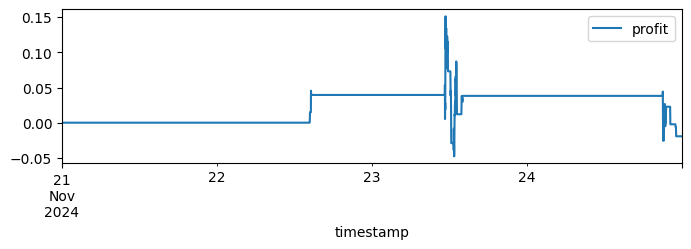

In [384]:
df_simple_reversal_trading2130[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

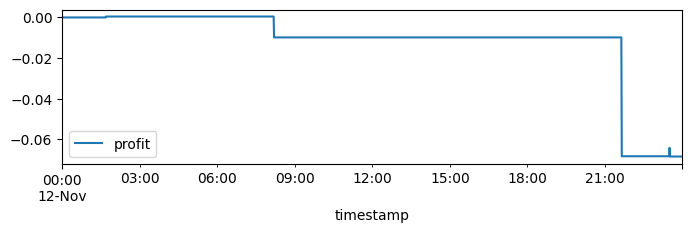

In [356]:
df_simple_reversal_trading12[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

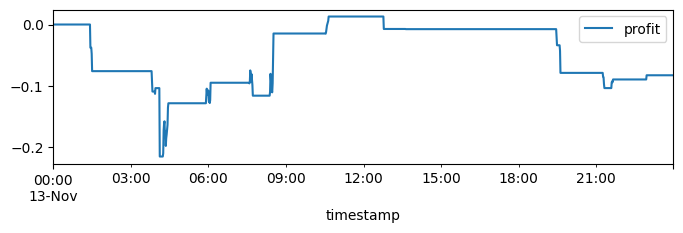

In [357]:
df_simple_reversal_trading13[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [22]:
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)

df_simple_reversal_trading = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature, trading_param_simple_reversal)

symbol_with_jumps: 64
0 symbol: 1INCH-USDT-SWAP: 0 (trading)
1 symbol: ACE-USDT-SWAP: 0 (trading)
2 symbol: AEVO-USDT-SWAP: 0 (trading)
3 symbol: AIDOGE-USDT-SWAP: 0 (trading)
4 symbol: ALGO-USDT-SWAP: 0 (trading)
5 symbol: ALPHA-USDT-SWAP: 0 (trading)
6 symbol: APE-USDT-SWAP: 0 (trading)
7 symbol: ARB-USDT-SWAP: 0 (trading)
8 symbol: BAND-USDT-SWAP: 0 (trading)
9 symbol: BLUR-USDT-SWAP: 0 (trading)
10 symbol: CHZ-USDT-SWAP: 0 (trading)
11 symbol: CSPR-USDT-SWAP: 0 (trading)
12 symbol: CVX-USDT-SWAP: 0 (trading)
13 symbol: DMAIL-USDT-SWAP: 0 (trading)
14 symbol: ENS-USDT-SWAP: 0 (trading)
15 symbol: ETH-USDT-SWAP: 0 (trading)
16 symbol: ETHW-USDT-SWAP: 0 (trading)
17 symbol: FITFI-USDT-SWAP: 0 (trading)
18 symbol: FRONT-USDT-SWAP: 28 (trading)
19 symbol: FXS-USDT-SWAP: 0 (trading)
20 symbol: GFT-USDT-SWAP: 55 (trading)
21 symbol: GMX-USDT-SWAP: 28 (trading)
22 symbol: GPT-USDT-SWAP: 0 (trading)
23 symbol: GRT-USDT-SWAP: 0 (trading)
24 symbol: KISHU-USDT-SWAP: 0 (trading)
25 symbol: LDO

<AxesSubplot:xlabel='timestamp'>

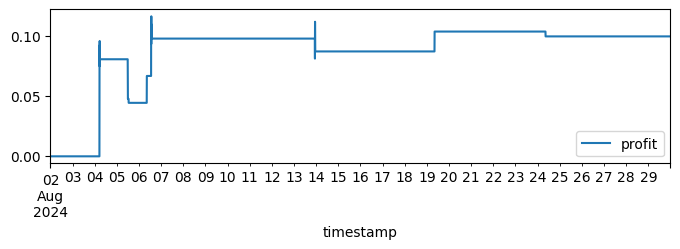

In [23]:
df_simple_reversal_trading[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

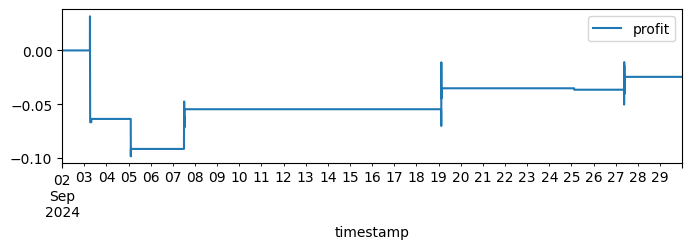

In [19]:
df_simple_reversal_trading[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

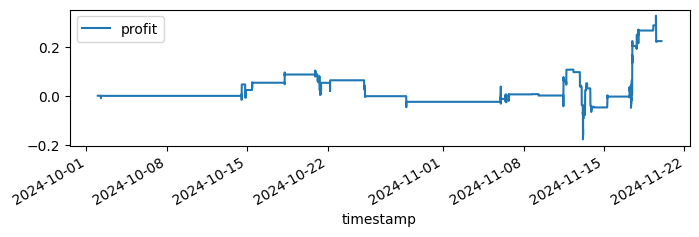

In [375]:
df_simple_reversal_trading[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

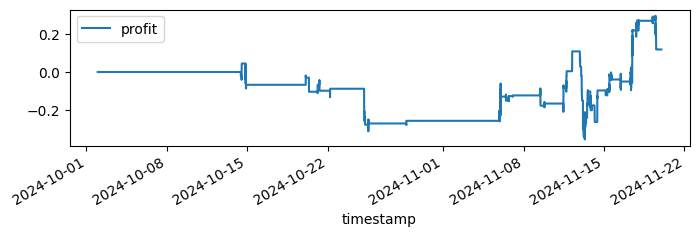

In [373]:
df_simple_reversal_trading[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

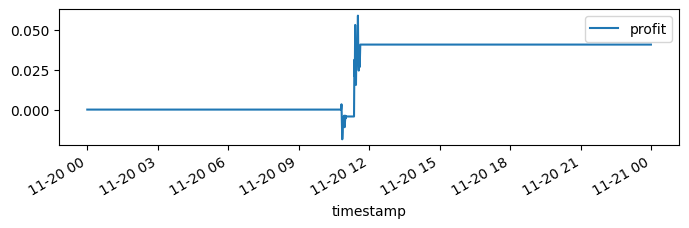

In [247]:
df_simple_reversal_trading20[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

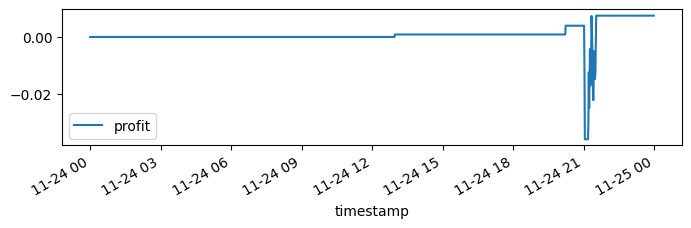

In [248]:
df_simple_reversal_trading24[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

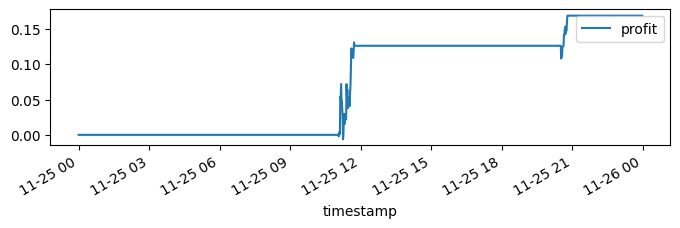

In [249]:
df_simple_reversal_trading25[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

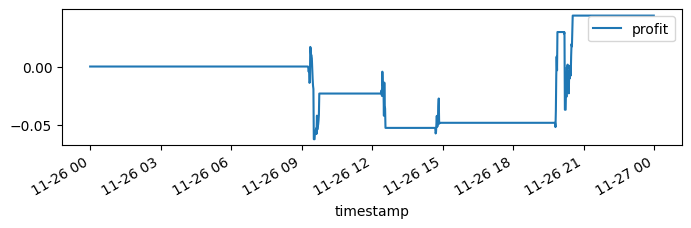

In [281]:
df_simple_reversal_trading26[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

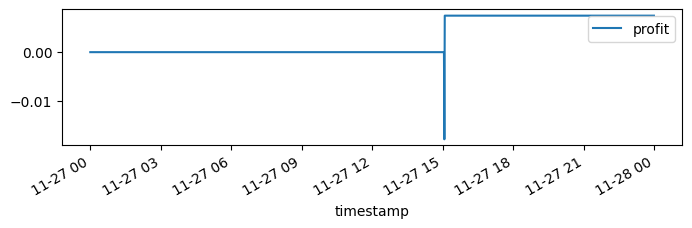

In [251]:
df_simple_reversal_trading27[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [358]:
df_simple_reversal_trading12[df_simple_reversal_trading12.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
PNUT-USDT-SWAP,-0.058606
ZENT-USDT-SWAP,-0.010276
NEIRO-USDT-SWAP,0.000459


In [359]:
df_simple_reversal_trading13[df_simple_reversal_trading13.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
AGLD-USDT-SWAP,-0.095122
X-USDT-SWAP,-0.020571
PNUT-USDT-SWAP,-0.001591
PEOPLE-USDT-SWAP,0.006842
PEPE-USDT-SWAP,0.027694


In [252]:
df_simple_reversal_trading20[df_simple_reversal_trading20.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
DGB-USDT-SWAP,0.040669


In [253]:
df_simple_reversal_trading24[df_simple_reversal_trading24.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
NOT-USDT-SWAP,0.000877
SAND-USDT-SWAP,0.003091
PUFFER-USDT-SWAP,0.003544


In [254]:
df_simple_reversal_trading25[df_simple_reversal_trading25.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
PUFFER-USDT-SWAP,0.045602
MORPHO-USDT-SWAP,0.046038
OL-USDT-SWAP,0.077084


In [282]:
df_simple_reversal_trading26[df_simple_reversal_trading26.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
MEMEFI-USDT-SWAP,-0.034179
MORPHO-USDT-SWAP,0.077879


In [256]:
df_simple_reversal_trading27[df_simple_reversal_trading27.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
GFT-USDT-SWAP,0.00754


In [343]:
df_simple_reversal_trading[df_simple_reversal_trading.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
AGLD-USDT-SWAP,-0.132731
CVX-USDT-SWAP,-0.130890
PNUT-USDT-SWAP,-0.112368
CAT-USDT-SWAP,-0.053726
MOODENG-USDT-SWAP,-0.025295
T-USDT-SWAP,-0.024625
FLOKI-USDT-SWAP,-0.020271
PEPE-USDT-SWAP,0.002739
DGB-USDT-SWAP,0.002917


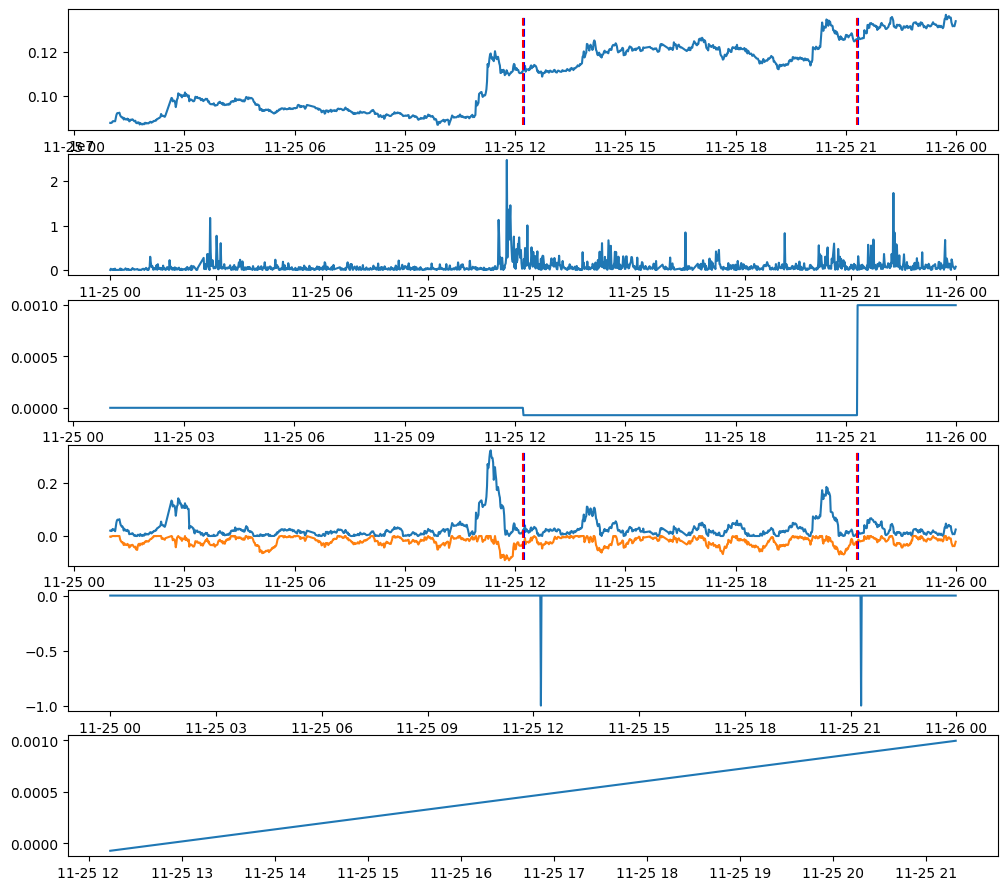

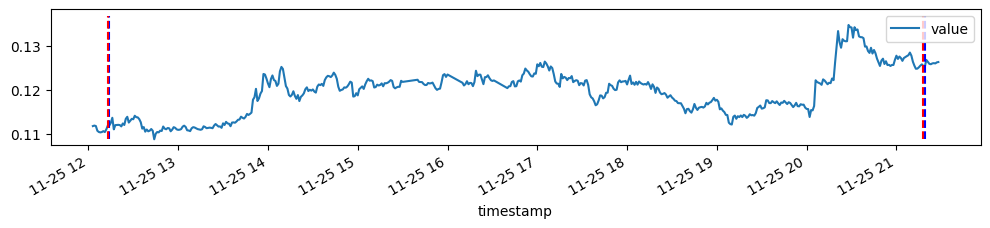

In [34]:
import algo.alpha.jitter_common.research
importlib.reload(algo.alpha.jitter_common.research)
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)

symbol_investigate = 'OL-USDT-SWAP'

#df = dfst_simple_feature[["close", "volume"]].reset_index().set_index("timestamp").copy()
df_sym_feature1, df_sym_trading1 = algo.alpha.jitter_common.research.investigate_symbol(
    df25.reset_index(), symbol_investigate, 
    algo.feature.simple_jitter.calculate.get_feature_df, 
    algo.alpha.jitter_simple_reversal.research.add_trading_columns, 
    trading_param_simple_reversal, figsize=(12, 11))

In [31]:
dfst_simple_feature26[
    dfst_simple_feature26.index.get_level_values("symbol") == symbol_investigate
][["close", 'ch_max', 'ch_min', "expected_v"]].reset_index().set_index('timestamp')[["close", "expected_v"]].plot(figsize=(12,2))

NameError: name 'dfst_simple_feature26' is not defined

In [33]:
df_sym_trading1[
    df_sym_trading1.ch_max > trading_param_simple_reversal.jump_threshold
][["value", 'ch_max', 'ch_min', "highest_ch_max_since_ch_max_threshold_crossed"]].reset_index().set_index('timestamp')

,value,ch_max,ch_min,highest_ch_max_since_ch_max_threshold_crossed
timestamp,,,,
2024-11-26 19:37:00-05:00,1.3167,0.157742,0.000000,0.00
2024-11-26 19:40:00-05:00,1.3762,0.210059,0.000000,0.00
2024-11-26 19:41:00-05:00,1.3500,0.179142,-0.019038,0.16
2024-11-26 19:42:00-05:00,1.3530,0.169808,-0.016858,0.16
2024-11-26 19:43:00-05:00,1.3966,0.207505,0.000000,0.20
2024-11-26 19:44:00-05:00,1.3368,0.155801,-0.042818,0.20
2024-11-26 19:45:00-05:00,1.3562,0.165020,-0.028927,0.20
2024-11-26 19:46:00-05:00,1.3644,0.172064,-0.023056,0.20
2024-11-26 19:47:00-05:00,1.3429,0.153595,-0.038451,0.20
